In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import pathlib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [3]:
data_dir = "/kaggle/input/gtsrb-german-traffic-sign"
train_csv = pd.read_csv(os.path.join(data_dir, "Train.csv"))
print("Dataset Loaded!", train_csv.shape)

Dataset Loaded! (39209, 8)


In [4]:
X, y = [], []
for i, row in train_csv.iterrows():
    img_path = os.path.join(data_dir, row['Path'])
    image = cv2.imread(img_path)
    image = cv2.resize(image, (32, 32))  # Resize to 32x32
    X.append(image)
    y.append(row['ClassId'])

In [5]:
X = np.array(X) / 255.0 

In [6]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y) 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Data Split Done! Train Shape:", X_train.shape, "Test Shape:", X_test.shape)

Data Split Done! Train Shape: (31367, 32, 32, 3) Test Shape: (7842, 32, 32, 3)


In [9]:
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.15, width_shift_range=0.1, height_shift_range=0.1)

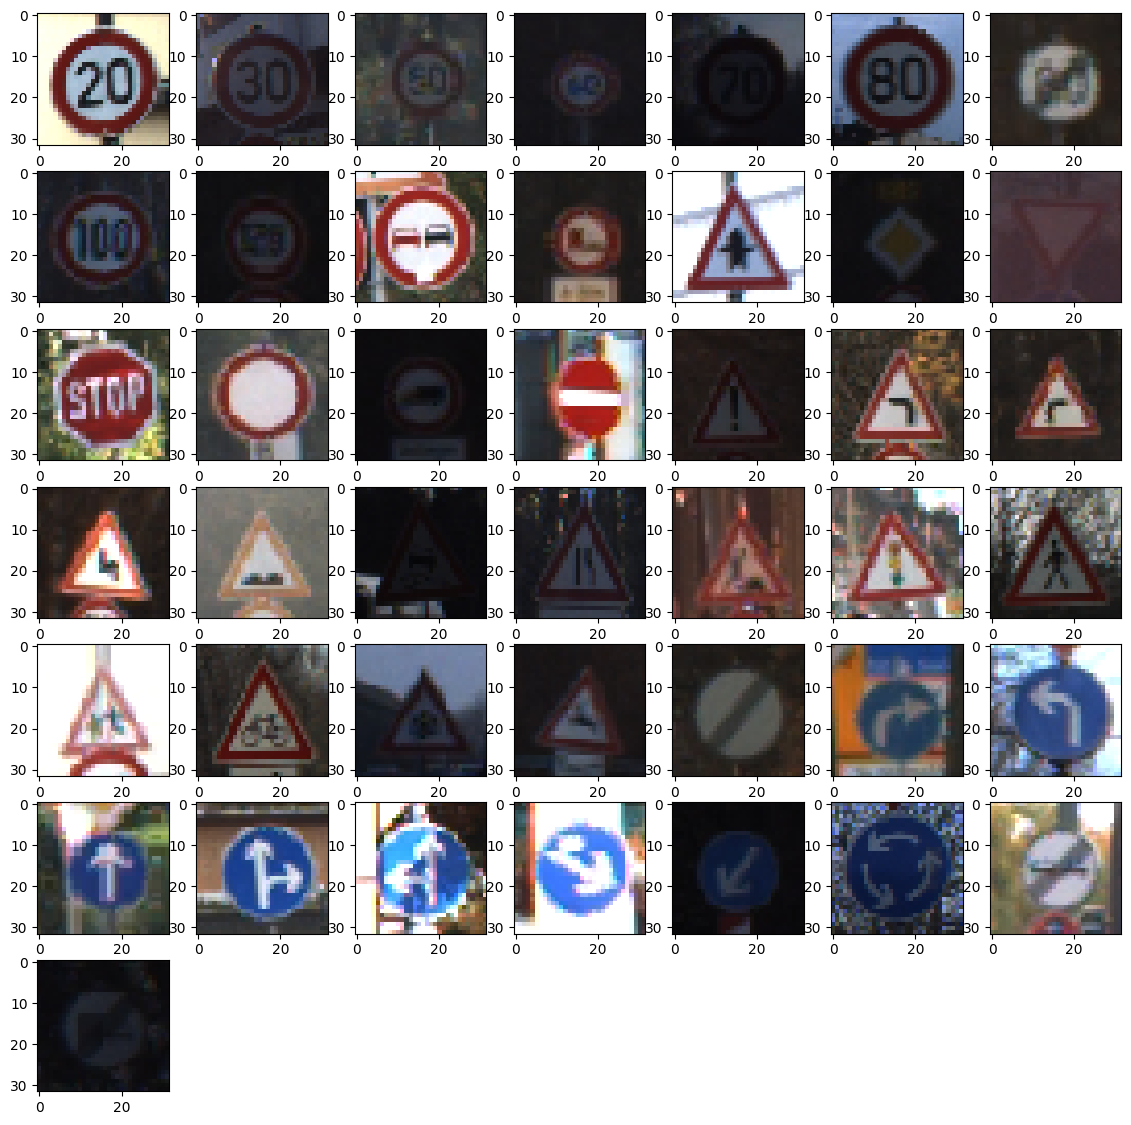

In [10]:
NUM_CATEGORIES = 43  # classes
IMG_WIDTH, IMG_HEIGHT = 32, 32
train_path = os.path.join(data_dir, "Train")
img_dir = pathlib.Path(train_path)
plt.figure(figsize=(14, 14))
for i in range(NUM_CATEGORIES):
    plt.subplot(7, 7, i+1)
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(IMG_WIDTH, IMG_HEIGHT))
    plt.imshow(img)
plt.show()


In [13]:
# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')  # 43 classes
])

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 36s 35ms/step - accuracy: 0.2182 - loss: 2.8155 - val_accuracy: 0.7592 - val_loss: 0.8078
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.7038 - loss: 0.9134 - val_accuracy: 0.9217 - val_loss: 0.2783
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 34s 34ms/step - accuracy: 0.8532 - loss: 0.4663 - val_accuracy: 0.9611 - val_loss: 0.1446
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.9071 - loss: 0.2939 - val_accuracy: 0.9688 - val_loss: 0.1077
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.9325 - loss: 0.2236 - val_accuracy: 0.9850 - val_loss: 0.0562
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.9472 - loss: 0.1703 - val_accuracy: 0.9880 - val_loss: 0.0465
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.9560 - loss: 0.1430 - val_accuracy: 0.9906 - val_loss: 0.0352
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.9586 - loss: 0.1334 - 

In [17]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9947 - loss: 0.0186
Test Accuracy: 99.44%


Text(0.5, 1.0, 'Model Accuracy')

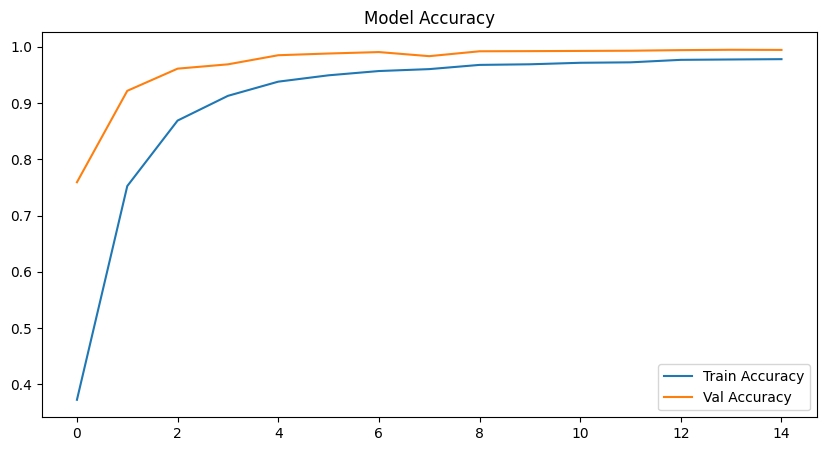

In [18]:
# plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')

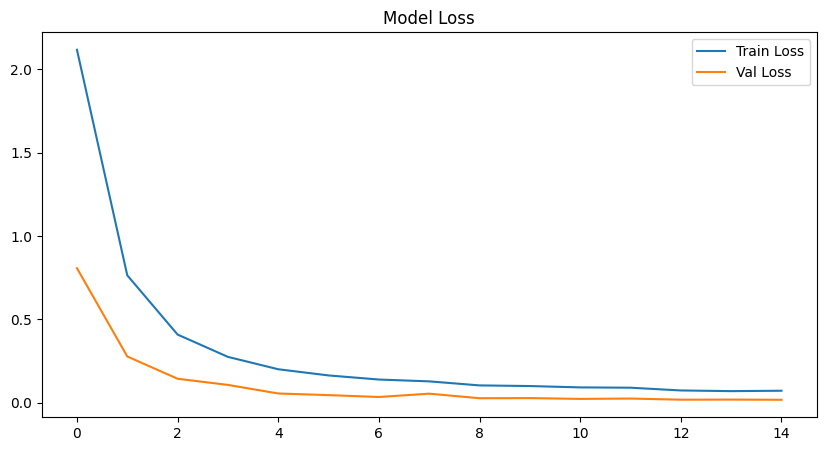

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


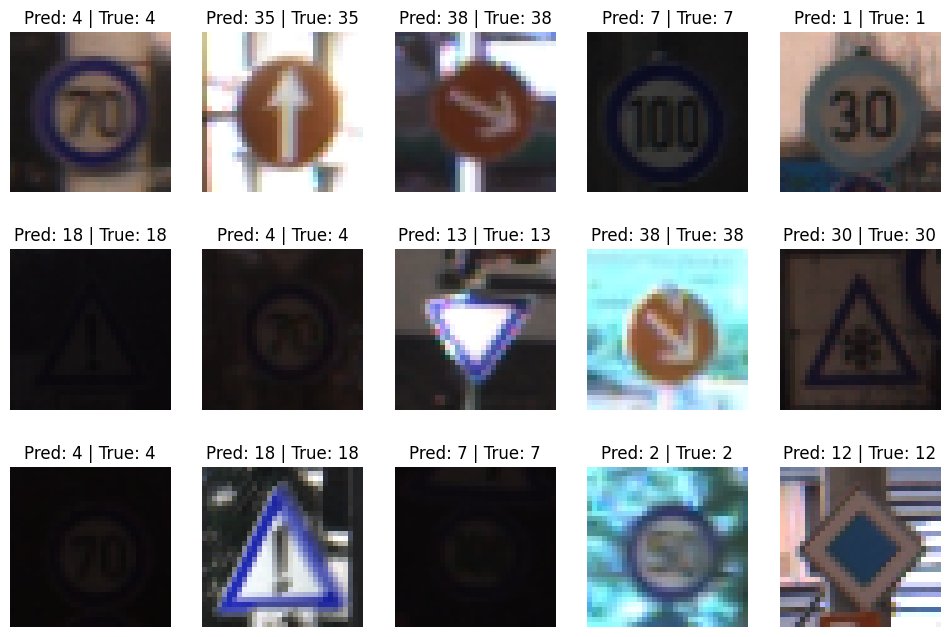

In [20]:
def predict_sample_images():
    fig, axes = plt.subplots(3, 5 , figsize=(12, 8))
    for i, ax in enumerate(axes.flat):
        img = X_test[i]
        true_label = np.argmax(y_test[i])
        pred_label = np.argmax(model.predict(img.reshape(1, 32, 32, 3)))
        ax.imshow(img)
        ax.set_title(f"Pred: {pred_label} | True: {true_label}")
        ax.axis('off')
    plt.show()

predict_sample_images()

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


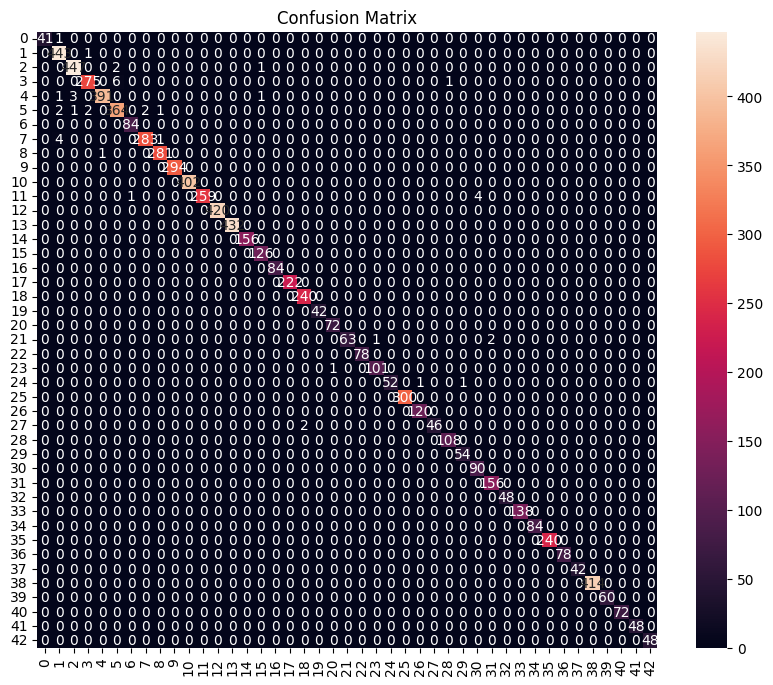

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()